# 전자제조데이터분석 과제 04

아래 "Example: Visualizing Seattle Bicycle Counts" 섹션의 코드 블럭들을 실행하고, 각 코드 블럭의 의도와 동작 방식들에 대하여 간략히 분석 후 해당 내용을 코멘트하여 제출하세요.

노트북 파일 내에 텍스트 블럭을 별도로 추가하여 분석 내용을 기술하고,
plot 관련 코드들은 가급적 Skip하세요.

**Due: 2022/10/23 23:59:59**

학번: 22510108

이름: 이성호

## Example: Visualizing Seattle Bicycle Counts

As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's [Fremont Bridge](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.
The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the [direct link to the dataset](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

As of summer 2016, the CSV can be downloaded as follows:

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD ##데이터 로드

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  495k    0  495k    0     0   195k      0 --:--:--  0:00:02 --:--:--  195k
100 2126k    0 2126k    0     0   616k      0 --:--:--  0:00:03 --:--:--  616k
100 2725k    0 2725k    0     0   741k      0 --:--:--  0:00:03 --:--:--  742k
curl: (3) URL using bad/illegal format or missing URL
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--   

Once this dataset is downloaded, we can use Pandas to read the CSV output into a ``DataFrame``.
We will specify that we want the Date as an index, and we want these dates to be automatically parsed:

In [4]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True) ## csv 파일을 읽어 데이터프레임으로 변환시키는데 이때, 로우는 기존의 'Date'라는 이름의 컬럼으로 설정한다
data.head() ##데이터프레임 위에서 5개 추출

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


For convenience, we'll further process this dataset by shortening the column names and adding a "Total" column:

In [6]:
data.columns = ['Total','West', 'East'] ##기존의 컬럼 이름을 Fremont Bridge Total 을 total, Fremont Bridge East Sidewalk를 west로, Fremont Bridge West Sidewalk을 east로 변경

Now let's take a look at the summary statistics for this data:

In [9]:
data.dropna().describe()  ## 결측치가 하나라도 존재하는 행을 제거하고 이에 대한 기술 통계값 출력

,Total,West,East
count,87586.000000,87586.000000,87586.000000
mean,107.240849,48.086623,59.154226
std,134.790561,61.573965,83.567491
min,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000
50%,60.000000,27.000000,30.000000
75%,144.000000,66.000000,75.000000
max,1097.000000,698.000000,850.000000


### Visualizing the data

We can gain some insight into the dataset by visualizing it.
Let's start by plotting the raw data:

In [10]:
%matplotlib inline
import seaborn; seaborn.set()   ## 씨본 패키지 호출

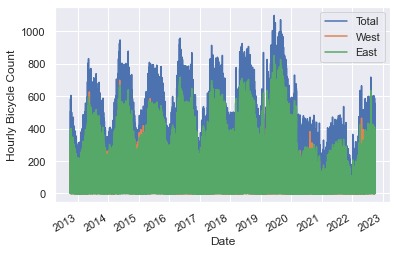

In [14]:
data.plot()  ## 기존 데이터에 대한 꺾은선 그래프
plt.ylabel('Hourly Bicycle Count'); #y축 라벨 지정

The ~150k hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's resample by week:

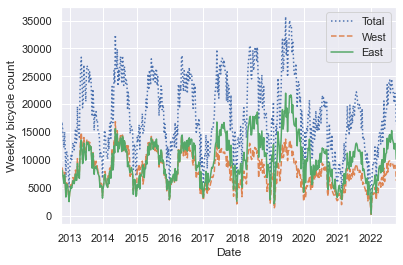

In [22]:
weekly = data.resample('W').sum() ##기존 데이터들을 1주일 단위로 다운샘플링 진행하여 시간간격이 1주일인 weekly 데이터 생성
weekly.plot(style=[':', '--', '-'])  #weekly 데이터에 대한 꺾은선 그래프(컬럼에 따라 다른 꺾은선 모양 도입)
plt.ylabel('Weekly bicycle count');   #y축 라벨 지정

This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week.

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the ``pd.rolling_mean()`` function.
Here we'll do a 30 day rolling mean of our data, making sure to center the window:

<AxesSubplot: xlabel='Date'>

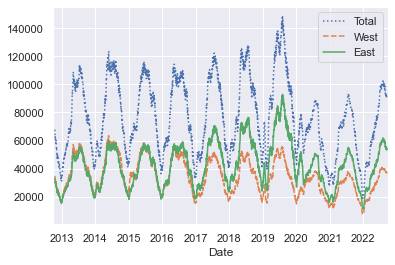

In [25]:
daily = data.resample('D').sum()  ##기존 데이터들을 1일 단위로 다운샘플링 진행하여 시간간격이 1일인 daily 데이터 생성
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-']) #daily 데이터에 대한 꺾은선 그래프(컬럼에 따라 다른 꺾은선 모양 도입)


The jaggedness of the result is due to the hard cutoff of the window.
We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window.
The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

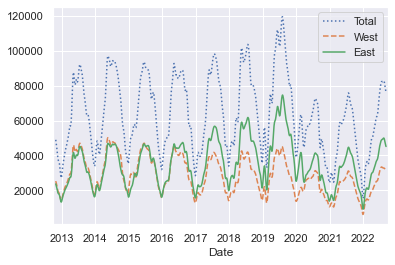

In [28]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']); # 윈도우 사이즈가 50인, 50일에 대한 이동 평균을 구한 뒤, 꺾은선 그래프를 그림(이때, 가우시안 형태로 무게를 다르게 부여)

### Digging into the data

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure.
For example, we might want to look at the average traffic as a function of the time of day.
We can do this using the GroupBy functionality discussed in [Aggregation and Grouping]:

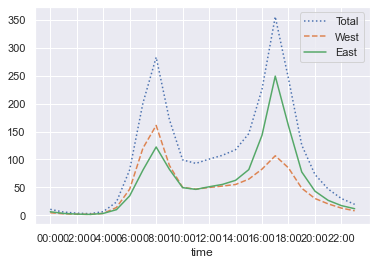

In [30]:
by_time = data.groupby(data.index.time).mean()  ##같은 시간대별로 모은 다음 평균을 구함
hourly_ticks = 2 * 60 * 60 * np.arange(12)  #시간 대 표현을 위한 x축
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);  #  시간대별 평군에 대한 꺽은선 그래프

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening.
This is likely evidence of a strong component of commuter traffic crossing the bridge.
This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

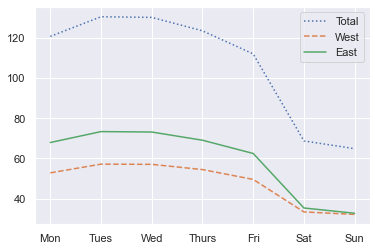

In [31]:
by_weekday = data.groupby(data.index.dayofweek).mean() ##같은 요일 별로 모은 다음 평균을 구함
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']  #요일별로 표현을 위한 x축
by_weekday.plot(style=[':', '--', '-']); #  요일에 따른 평군에 대한 꺾은선 그래프

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends.
We'll start by grouping by both a flag marking the weekend, and the time of day:

In [32]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')  ## 0~4(월~금)을 weekday & 5~6(토~일)을 weekend 로 나눠주는 코드
by_time = data.groupby([weekend, data.index.time]).mean() ## 같은 시간대별로 모은 다음 주중과 주말로 나누어 평균을 구함

Now we'll use some of the Matplotlib tools described in [Multiple Subplots](04.08-Multiple-Subplots.ipynb) to plot two panels side by side:

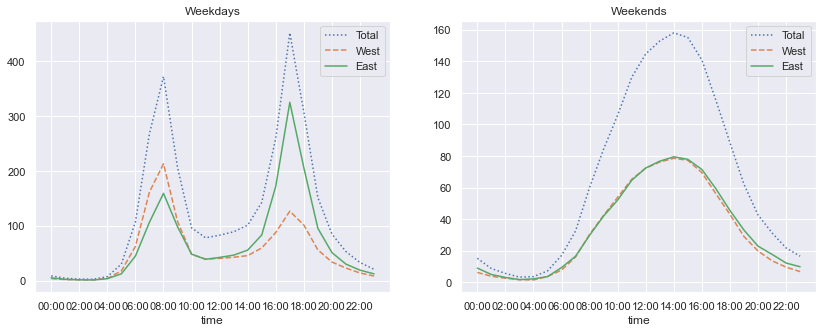

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])  # 주말 첫번째 행(토요일)에 대한 시간대 별 꺾은선 그래프
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']); # 주말 두번째 행(토요일)에 대한 시간대 별 꺾은선 그래프

#요일에 따라 다른 분포를 보임

The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.